### Problem Statements:

### We want predict Cocacola sales

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from numpy import sqrt
from numpy import log

from pandas import Grouper
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the file
coca=pd.read_excel(r'E:\DS Assigment\Forecasting/CocaCola_Sales_Rawdata.xlsx')

In [3]:
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
coca['Quarter_Year'] = coca['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
coca

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [7]:
#correcting datetime format
coca['Date'] = (pd.to_datetime(coca['Quarter_Year'].str.split(" ").apply(lambda x: "".join(x[::-1])), dayfirst = True))
coca

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [8]:
coca.drop(columns = ['Quarter', 'Quarter_Year'], inplace = True)
coca

,Sales,Date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01
5,2104.411995,1987-04-01
6,2014.362999,1987-07-01
7,1991.746998,1987-10-01
8,1869.049999,1988-01-01
9,2313.631996,1988-04-01


In [9]:
coca[coca.duplicated()].shape

(0, 2)

In [10]:
coca1 = coca[['Sales', 'Date']]

In [11]:
coca1

,Sales,Date
0,1734.827000,1986-01-01
1,2244.960999,1986-04-01
2,2533.804993,1986-07-01
3,2154.962997,1986-10-01
4,1547.818996,1987-01-01
5,2104.411995,1987-04-01
6,2014.362999,1987-07-01
7,1991.746998,1987-10-01
8,1869.049999,1988-01-01
9,2313.631996,1988-04-01


In [12]:
coca1.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [13]:
coca1.set_index('Date', inplace = True)
coca1

,Sales
Date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996
1987-04-01,2104.411995
1987-07-01,2014.362999
1987-10-01,1991.746998
1988-01-01,1869.049999


In [14]:
coca1.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

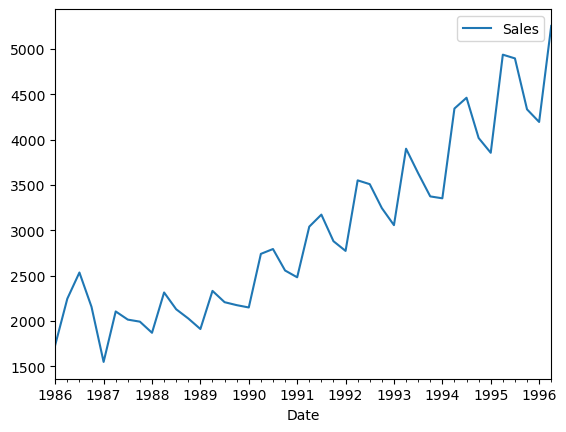

In [15]:
#line plot of time series
coca1.plot()
plt.show() #this shows and upward trend and what appears to be multiplicative seasonality but it is not clear

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

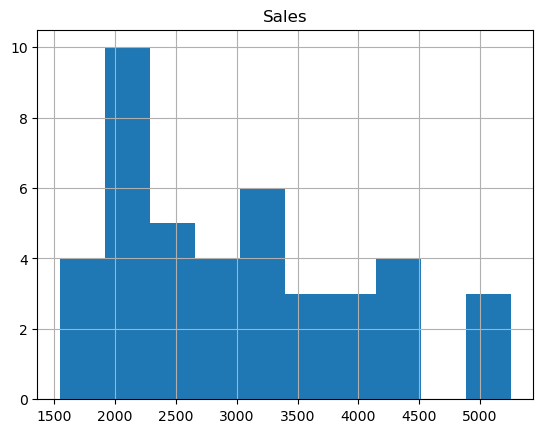

In [16]:
coca1.hist() #histogram

<AxesSubplot:ylabel='Density'>

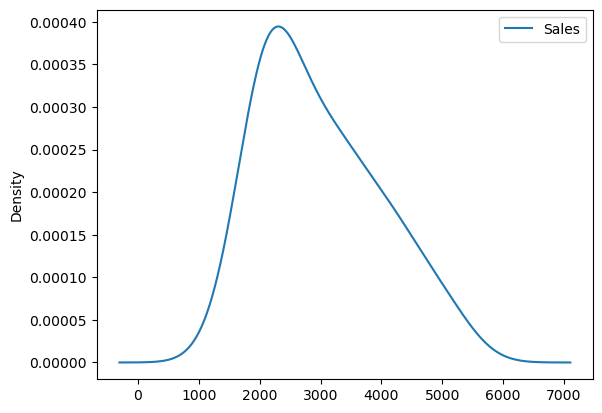

In [17]:
coca1.plot(kind='kde') #density plot

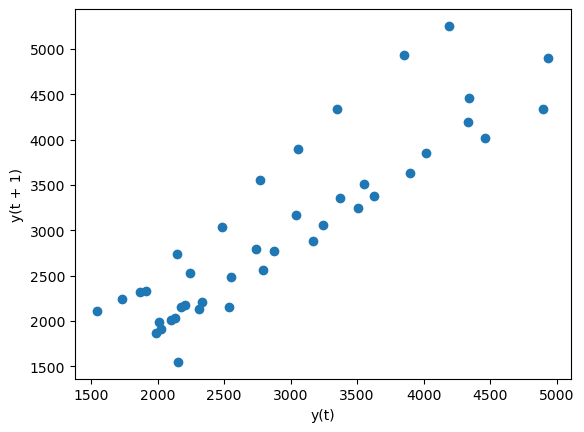

In [18]:
lag_plot(coca1) #lagplot
plt.show()

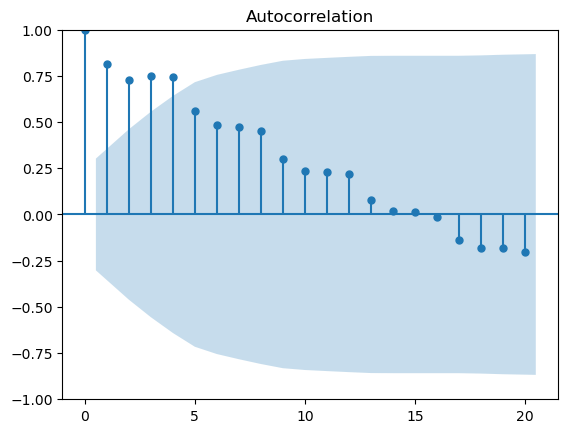

In [19]:
plot_acf(coca1, lags = 20) #autocorrelation plot
plt.show()

#### Transformation

In [20]:
#upsampling
upsampled_coca = coca1.resample('M').mean()
print(upsampled_coca.head(10))

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997


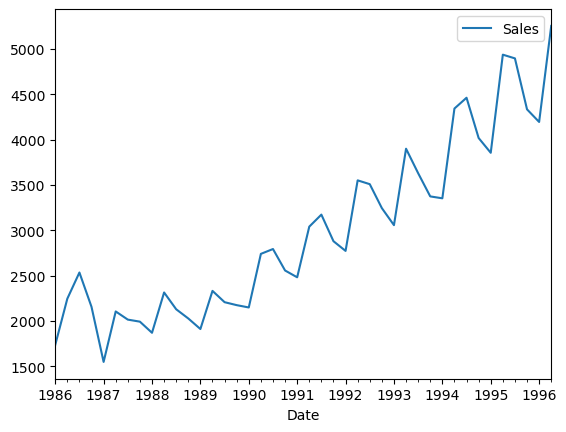

In [21]:
#interpolation for nan values above
interpolated_coca = upsampled_coca.interpolate(methods = 'linear')
print(interpolated_coca.head(10))
interpolated_coca.plot()
plt.show()

In [22]:
df = DataFrame(coca1.values) #SQRT transformation
df.columns = ['Sales']
df['Sales'] = sqrt(df['Sales'])

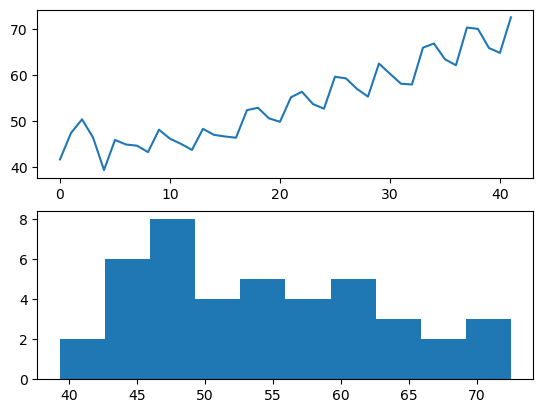

In [23]:
# line plot
plt.subplot(211)
plt.plot(df['Sales'])
# histogram
plt.subplot(212)
plt.hist(df['Sales'])
plt.show()

In [24]:
df = DataFrame(coca1.values) #LOG transformation
df.columns = ['Sales']
df['Sales'] = log(df['Sales'])

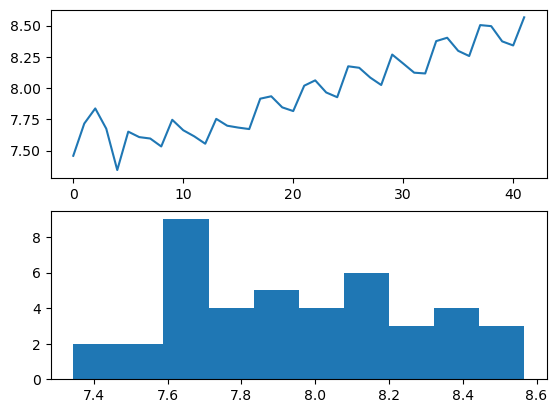

In [25]:
# line plot
plt.subplot(211)
plt.plot(df['Sales'])
# histogram
plt.subplot(212)
plt.hist(df['Sales'])
plt.show()

In [26]:
interpolated_coca

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [27]:
Train = interpolated_coca.head(112)
Test = interpolated_coca.tail(12)

#### Moving Average

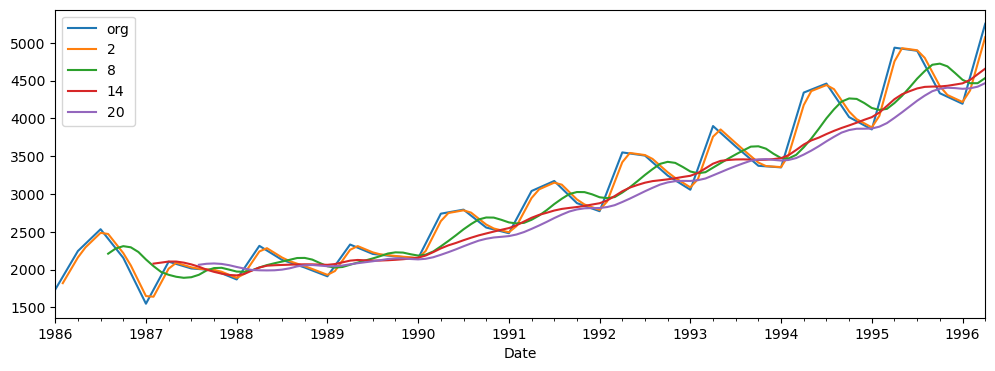

In [28]:
plt.figure(figsize=(12,4))
interpolated_coca.Sales.plot(label="org") #org = original
for i in range(2,24,6):
    interpolated_coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#### Time Series Decomposition Plot

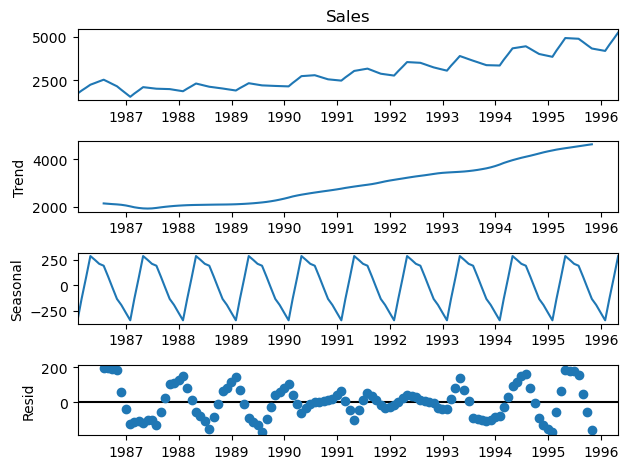

In [29]:
decompose_ts_add = seasonal_decompose(interpolated_coca.Sales,period=12)
decompose_ts_add.plot()
plt.show()

#### ACF and PACF Plots

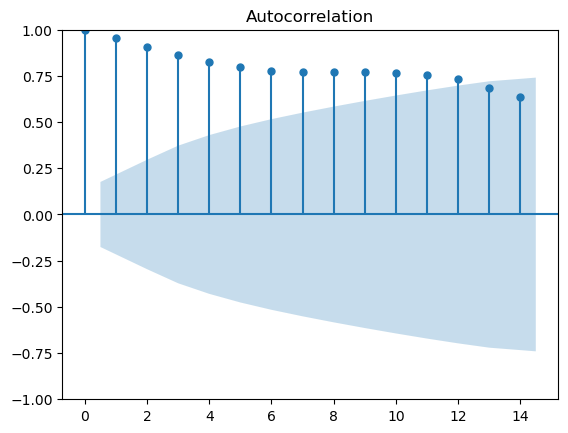

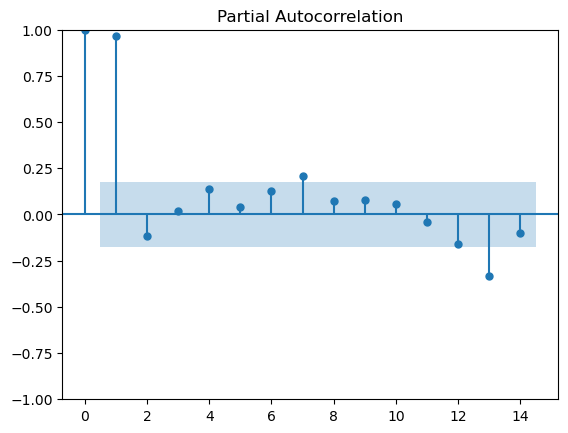

In [30]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated_coca.Sales, lags=14)
tsa_plots.plot_pacf(interpolated_coca.Sales, lags=14)
plt.show()

#### Evaluation Metric MAPE

In [31]:
def MAPE(pred,org): #lower MAPE value = better model
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#### Sequential Exponential Method

In [32]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.1)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

11.483469920853226

#### Holt Method

In [33]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

7.9715447532695825

#### Holts winter exponential smoothing with additive seasonality and additive trend

In [34]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

4.980642076778319

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [35]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.760059857710733

#### Final model by combining Test and Train

In [36]:
hwe_model_add_add = ExponentialSmoothing(interpolated_coca["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [37]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

1996-05-31    5354.232821
1996-06-30    5488.580134
1996-07-31    5612.108642
1996-08-31    5644.662161
1996-09-30    5689.013230
1996-10-31    5731.622796
1996-11-30    5816.957189
1996-12-31    5870.826463
1997-01-31    5940.314993
1997-02-28    6325.145875
Freq: M, dtype: float64

In [38]:
interpolated_coca

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [39]:
interpolated_coca.reset_index(inplace = True)
interpolated_coca

,Date,Sales
0,1986-01-31,1734.827000
1,1986-02-28,1904.871666
2,1986-03-31,2074.916332
3,1986-04-30,2244.960999
4,1986-05-31,2341.242330
...,...,...
119,1995-12-31,4240.333333
120,1996-01-31,4194.000000
121,1996-02-29,4547.000000
122,1996-03-31,4900.000000


In [40]:
interpolated_coca['t'] = 1
interpolated_coca

,Date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,1
2,1986-03-31,2074.916332,1
3,1986-04-30,2244.960999,1
4,1986-05-31,2341.242330,1
...,...,...,...
119,1995-12-31,4240.333333,1
120,1996-01-31,4194.000000,1
121,1996-02-29,4547.000000,1
122,1996-03-31,4900.000000,1


In [41]:
for i, row in interpolated_coca.iterrows():
    interpolated_coca['t'].iloc[i] = i+1

In [42]:
interpolated_coca

,Date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,2
2,1986-03-31,2074.916332,3
3,1986-04-30,2244.960999,4
4,1986-05-31,2341.242330,5
...,...,...,...
119,1995-12-31,4240.333333,120
120,1996-01-31,4194.000000,121
121,1996-02-29,4547.000000,122
122,1996-03-31,4900.000000,123


In [43]:
interpolated_coca['t_square'] = (interpolated_coca['t'])**2
interpolated_coca

,Date,Sales,t,t_square
0,1986-01-31,1734.827000,1,1
1,1986-02-28,1904.871666,2,4
2,1986-03-31,2074.916332,3,9
3,1986-04-30,2244.960999,4,16
4,1986-05-31,2341.242330,5,25
...,...,...,...,...
119,1995-12-31,4240.333333,120,14400
120,1996-01-31,4194.000000,121,14641
121,1996-02-29,4547.000000,122,14884
122,1996-03-31,4900.000000,123,15129


In [44]:
interpolated_coca["month"] = interpolated_coca.Date.dt.strftime("%b") # month extraction
interpolated_coca["year"] = interpolated_coca.Date.dt.strftime("%Y") # year extraction

In [45]:
interpolated_coca

,Date,Sales,t,t_square,month,year
0,1986-01-31,1734.827000,1,1,Jan,1986
1,1986-02-28,1904.871666,2,4,Feb,1986
2,1986-03-31,2074.916332,3,9,Mar,1986
3,1986-04-30,2244.960999,4,16,Apr,1986
4,1986-05-31,2341.242330,5,25,May,1986
...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995
120,1996-01-31,4194.000000,121,14641,Jan,1996
121,1996-02-29,4547.000000,122,14884,Feb,1996
122,1996-03-31,4900.000000,123,15129,Mar,1996


In [46]:
#Coverting dummy variables
months = pd.get_dummies(interpolated_coca['month'])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,1,0,0,0,0,0,0,0,0,0
120,0,0,0,0,1,0,0,0,0,0,0,0
121,0,0,0,1,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,1,0,0,0,0


In [47]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [48]:
coca2 = pd.concat([interpolated_coca, months], axis = 1)
coca2.head()

,Date,Sales,t,t_square,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0


In [49]:
coca2['log_sales'] = np.log(coca2['Sales'])
coca2

,Date,Sales,t,t_square,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995,0,0,0,0,0,0,0,0,0,0,0,1,8.352397
120,1996-01-31,4194.000000,121,14641,Jan,1996,1,0,0,0,0,0,0,0,0,0,0,0,8.341410
121,1996-02-29,4547.000000,122,14884,Feb,1996,0,1,0,0,0,0,0,0,0,0,0,0,8.422223
122,1996-03-31,4900.000000,123,15129,Mar,1996,0,0,1,0,0,0,0,0,0,0,0,0,8.496990


<AxesSubplot:xlabel='month', ylabel='year'>

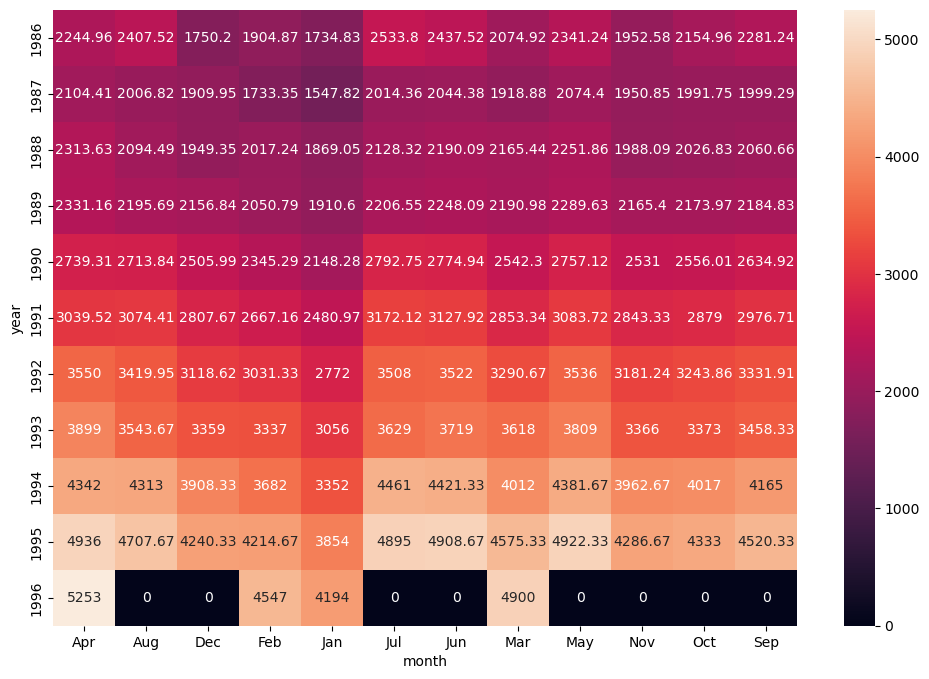

In [50]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=coca2,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Sales'>

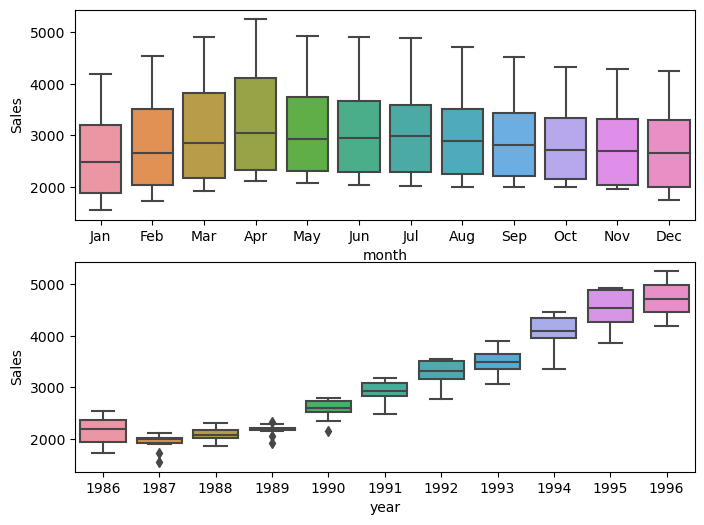

In [51]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=coca2)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=coca2)

<AxesSubplot:xlabel='year', ylabel='Sales'>

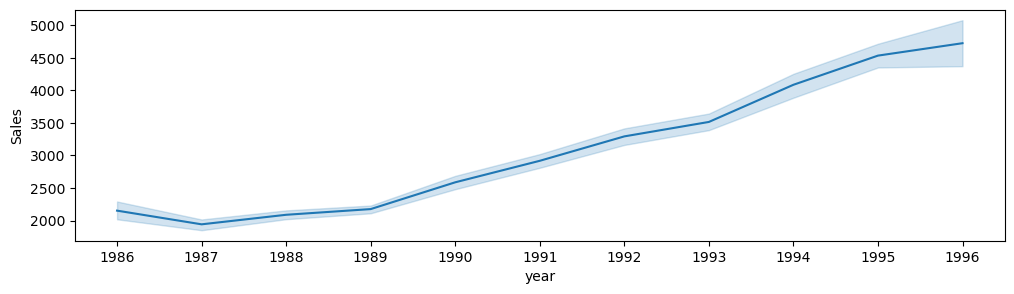

In [52]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=coca2)

#### Spiliting Data

In [53]:
Train = coca2.head(140)
Test = coca2.tail(14)

In [54]:
#Linear Model - lower rmse will be selected
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

479.41944212323216

In [55]:
#Exponential - apply log on the values

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

422.6366180705741

In [56]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

379.6429303503136

In [57]:
#Additive seasonality 

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1644.680565878146

In [58]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

182.0337279324142

In [59]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1780.1267602111802

In [60]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

178.23125398212807

In [61]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,178.231254
4,rmse_add_sea_quad,182.033728
2,rmse_Quad,379.642930
1,rmse_Exp,422.636618
0,rmse_linear,479.419442
3,rmse_add_sea,1644.680566
5,rmse_Mult_sea,1780.126760


### Conclusion:

#### From the above values, we can observe that Multiplicative Additive Seasonality has the lowest RMSE value. Therefore, it will be selected.